In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [2]:
#Import Each file
path01 = 'Census_SubstanceUse_Death_Data.csv'
df_main = pd.read_csv(path01)

In [3]:
path03= 'McD_Location_FIPS.csv'
df3 = pd.read_csv(path03)

In [4]:
df3 = df3.groupby('FIPS')
df3 = df3.count()
df3 = df3.rename(columns={'Unnamed: 0' : 'McDonalds Count'})
df3 = df3.drop('properties.addressLine3', axis=1)

In [5]:
df_main = df_main.merge(df3, on='FIPS')

In [6]:
df_main.head()

,Unnamed: 0,FIPS,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),...,HPSA Shortage,County,State_y,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count
0,0,1001,AL,Autauga County,"54,876","54,366",5.8,1.45,0.90,2.11,...,6.96,Autauga County,AL,1001.0,17.0,NaN,NaN,17.0,55395.0,1
1,1,1003,AL,Baldwin County,"199,189","49,626",6.1,2.53,1.88,3.36,...,1.03,Baldwin County,AL,1003.0,97.0,18.0,40.0,155.0,200111.0,11
2,2,1003,AL,Baldwin County,"199,189","49,626",6.1,2.53,1.88,3.36,...,1.03,Baldwin County,AL,1003.0,97.0,18.0,40.0,155.0,200111.0,11
3,3,1003,AL,Baldwin County,"199,189","49,626",6.1,2.53,1.88,3.36,...,1.03,Baldwin County,AL,1003.0,97.0,18.0,40.0,155.0,200111.0,11
4,4,1003,AL,Baldwin County,"199,189","49,626",6.1,2.53,1.88,3.36,...,1.03,Baldwin County,AL,1003.0,97.0,18.0,40.0,155.0,200111.0,11


In [7]:
#df_main = df_main.set_index('FIPS')

In [8]:
df_main = df_main.drop_duplicates('FIPS')

In [9]:
df_main.columns

Index(['Unnamed: 0', 'FIPS', 'State_x', 'Area_Name', 'POP_ESTIMATE_2014',
       'HH_income_2014', 'Unemployment_rate_2014', 'Alcohol Mortality Rate',
       'Alcohol Mortality Rate(F)', 'Alcohol Mortality Rate(M)',
       'Drug Mortality Rate', 'Drug Mortality Rate(F)',
       'Drug Mortality Rate(M)', 'Self-harm Mortality Rate',
       'Self-harm Mortality Rate(F)', 'Self-harm Mortality Rate(M)',
       'Int. Violence Mortality Rate', 'Int. Violence Mortality Rate(F)',
       'Int. Violence Mortality Rate(M)', 'Common State Abbreviation',
       'Rural Status Description', 'HPSA Postal Code', 'Provider Type',
       'Common County Name', 'HPSA Degree of Shortage',
       'HPSA Designation Population', 'HPSA Estimated Served Population',
       'HPSA Score', 'HPSA Shortage', 'County', 'State_y', 'County Code',
       'Mental Deaths', 'Alcohol Deaths', 'Drug Deaths', 'Total Deaths',
       'Population', 'McDonalds Count'],
      dtype='object')

In [10]:
df_main

,Unnamed: 0,FIPS,State_x,Area_Name,POP_ESTIMATE_2014,HH_income_2014,Unemployment_rate_2014,Alcohol Mortality Rate,Alcohol Mortality Rate(F),Alcohol Mortality Rate(M),...,HPSA Shortage,County,State_y,County Code,Mental Deaths,Alcohol Deaths,Drug Deaths,Total Deaths,Population,McDonalds Count
0,0,1001,AL,Autauga County,"54,876","54,366",5.8,1.45,0.90,2.11,...,6.96,Autauga County,AL,1001.0,17.0,NaN,NaN,17.0,55395.0,1
1,1,1003,AL,Baldwin County,"199,189","49,626",6.1,2.53,1.88,3.36,...,1.03,Baldwin County,AL,1003.0,97.0,18.0,40.0,155.0,200111.0,11
24,24,1005,AL,Barbour County,"26,758","34,971",10.5,2.72,1.89,3.57,...,0.93,Barbour County,AL,1005.0,11.0,NaN,NaN,11.0,26887.0,1
27,27,1007,AL,Bibb County,"22,541","39,546",7.2,1.22,0.70,1.92,...,0.00,Bibb County,AL,1007.0,10.0,NaN,NaN,10.0,22506.0,1
30,30,1009,AL,Blount County,"57,521","45,567",6.1,1.31,0.77,2.03,...,16.66,Blount County,AL,1009.0,24.0,NaN,12.0,36.0,57719.0,2
31,31,1011,AL,Bullock County,"10,665","26,580",8.8,3.05,2.09,4.18,...,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
33,33,1013,AL,Butler County,"20,343","32,512",8.6,1.61,1.07,2.28,...,6.23,Butler County,AL,1013.0,11.0,NaN,NaN,11.0,20296.0,1
34,34,1015,AL,Calhoun County,"115,995","41,123",8.0,1.50,1.02,2.09,...,3.07,Calhoun County,AL,1015.0,58.0,NaN,19.0,77.0,115916.0,6
35,35,1017,AL,Chambers County,"33,980","34,116",6.7,2.35,1.63,3.21,...,15.55,Chambers County,AL,1017.0,17.0,NaN,NaN,17.0,34076.0,1
36,36,1019,AL,Cherokee County,"25,902","38,013",5.8,1.33,0.82,1.98,...,5.48,Cherokee County,AL,1019.0,16.0,NaN,NaN,16.0,26037.0,1


In [11]:
df_main.to_csv('NewListAll2014-UPDATE01.csv')

In [12]:
df_main = df_main.dropna(subset=['HH_income_2014'])

Text(0, 0.5, 'Alcohol Mortality Rate')

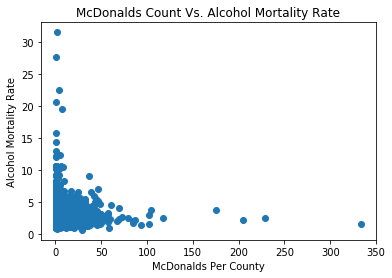

In [13]:
do = plt.scatter(df_main['McDonalds Count'], df_main['Alcohol Mortality Rate'])
plt.title("McDonalds Count Vs. Alcohol Mortality Rate")
plt.xlabel("McDonalds Per County")
plt.ylabel("Alcohol Mortality Rate")

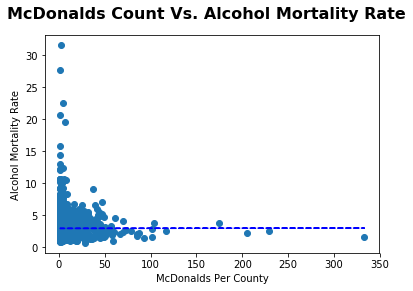

In [20]:
am_slope, am_int, am_r, am_p, am_std_err = linregress(df_main['McDonalds Count'], df_main['Alcohol Mortality Rate'])
am_fit = am_slope * df_main['McDonalds Count'] + am_int

#fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

#do.plt(df_main['McDonalds Count'], df_main['Alcohol Mortality Rate'], linewidth=1, marker="o")
#do.plt(df_main['McDonalds Count'], am_fit, "b--", linewidth=1)



fig, ax = plt.subplots()

fig.suptitle("McDonalds Count Vs. Alcohol Mortality Rate", fontsize=16, fontweight="bold")

#ax.set_xlim(0, (df_main['McDonalds Count'].max())
#ax.set_ylim(0, df_main['Alcohol Mortality Rate'].max())

ax.set_xlabel("McDonalds Per County")
ax.set_ylabel("Alcohol Mortality Rate")

ax.plot(df_main['McDonalds Count'], df_main['Alcohol Mortality Rate'], linewidth=0, marker='o')
ax.plot(df_main['McDonalds Count'], am_fit, 'b--')

plt.savefig('images/McDvsAlc.png')
plt.show()

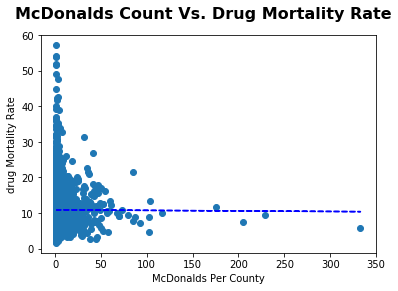

In [21]:
dm_slope, dm_int, dm_r, dm_p, dm_std_err = linregress(df_main['McDonalds Count'], df_main['Drug Mortality Rate'])
dm_fit = dm_slope * df_main['McDonalds Count'] + dm_int


fig2, ay = plt.subplots()

fig2.suptitle("McDonalds Count Vs. Drug Mortality Rate", fontsize=16, fontweight="bold")

#ax.set_xlim(0, (df_main['McDonalds Count'].max())
#ax.set_ylim(0, df_main['Alcohol Mortality Rate'].max())

ay.set_xlabel("McDonalds Per County")
ay.set_ylabel("drug Mortality Rate")

ay.plot(df_main['McDonalds Count'], df_main['Drug Mortality Rate'], linewidth=0, marker='o')
ay.plot(df_main['McDonalds Count'], dm_fit, 'b--')


plt.savefig('images/McDvsDrug.png')
plt.show()

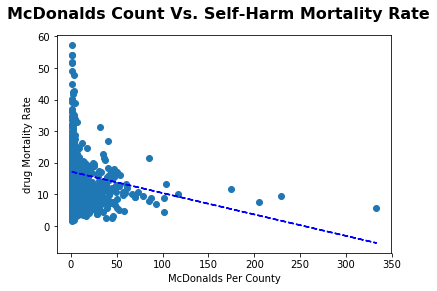

In [22]:
sm_slope, sm_int, sm_r, sm_p, sm_std_err = linregress(df_main['McDonalds Count'], df_main['Self-harm Mortality Rate'])
sm_fit = sm_slope * df_main['McDonalds Count'] + sm_int


fig3, az = plt.subplots()

fig3.suptitle("McDonalds Count Vs. Self-Harm Mortality Rate", fontsize=16, fontweight="bold")


az.set_xlabel("McDonalds Per County")
az.set_ylabel("drug Mortality Rate")

az.plot(df_main['McDonalds Count'], df_main['Drug Mortality Rate'], linewidth=0, marker='o')
az.plot(df_main['McDonalds Count'], sm_fit, 'b--')

plt.savefig('images/McDvsSelf.png')
plt.show()

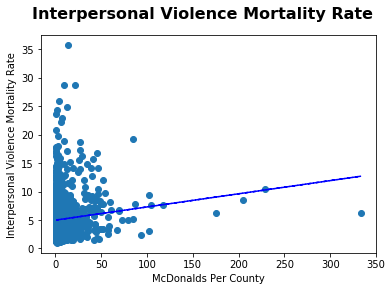

In [27]:
im_slope, im_int, im_r, im_p, im_std_err = linregress(df_main['McDonalds Count'], df_main['Int. Violence Mortality Rate'])
im_fit = im_slope * df_main['McDonalds Count'] + im_int


fig4, aa = plt.subplots()

fig4.suptitle("Interpersonal Violence Mortality Rate", fontsize=16, fontweight="bold")


aa.set_xlabel("McDonalds Per County")
aa.set_ylabel("Interpersonal Violence Mortality Rate")

aa.plot(df_main['McDonalds Count'], df_main['Int. Violence Mortality Rate'], linewidth=0, marker='o')
aa.plot(df_main['McDonalds Count'], im_fit, 'b--')

plt.savefig('images/McDvsInter.png')
plt.show()

In [25]:
df_main = df_main.dropna(subset=['Population'])
df_main = df_main.dropna(subset=['McDonalds Count'])

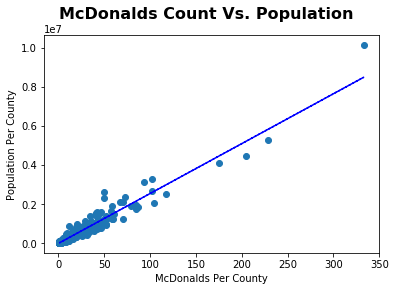

In [26]:
pop_slope, pop_int, pop_r, pop_p, pop_std_err = linregress(df_main['McDonalds Count'], df_main['Population'])
pop_fit = pop_slope * df_main['McDonalds Count'] + pop_int


fig5, ab = plt.subplots()

fig5.suptitle("McDonalds Count Vs. Population", fontsize=16, fontweight="bold")


ab.set_xlabel("McDonalds Per County")
ab.set_ylabel("Population Per County")

ab.plot(df_main['McDonalds Count'], df_main['Population'], linewidth=0, marker='o')
ab.plot(df_main['McDonalds Count'], pop_fit, 'b--')

plt.savefig('images/McDvsPop.png')
plt.show()

In [ ]:
plt.scatter(df_main['McDonalds Count'], df_main['Drug Mortality Rate'])
plt.title("McDonalds Count Vs. Drug Mortality Rate")
plt.xlabel("McDonalds Per County")
plt.ylabel("Drug Mortality Rate")

In [ ]:
plt.scatter(df_main['McDonalds Count'], df_main['Self-harm Mortality Rate'])
plt.title("McDonalds Count Vs. Self-Harm Mortality Rate")
plt.xlabel("McDonalds Per County")
plt.ylabel("Self-Harm Mortality Rate")

In [ ]:
plt.scatter(df_main['McDonalds Count'], df_main['Int. Violence Mortality Rate'])
plt.title("McDonalds Count Vs. Interpersonal Mortality Rate")
plt.xlabel("McDonalds Per County")
plt.ylabel("Interpersonal Mortality Rate")

In [28]:
linregress(df_main['McDonalds Count'], df_main['Int. Violence Mortality Rate'])

LinregressResult(slope=0.023159351700883558, intercept=4.980061104704483, rvalue=0.10965792293440513, pvalue=4.574319979381036e-06, stderr=0.005036855382781535)

In [18]:
linregress(df_main['McDonalds Count'], df_main['Alcohol Mortality Rate'])

LinregressResult(slope=0.0001586975022142896, intercept=2.898519300587145, rvalue=0.0012533707322605323, pvalue=0.9526705910206207, stderr=0.0026734715337222827)

In [19]:
linregress(df_main['McDonalds Count'], df_main['Drug Mortality Rate'])

LinregressResult(slope=-0.0015172729715478583, intercept=10.912502237117929, rvalue=-0.0035623084637755676, pvalue=0.8660374925357086, stderr=0.008993211481919332)

In [20]:
linregress(df_main['McDonalds Count'], df_main['Self-harm Mortality Rate'])

LinregressResult(slope=-0.06767191604935707, intercept=17.223640060088385, rvalue=-0.2046567223550048, pvalue=1.1785118787616479e-22, stderr=0.0068340284668845395)

In [35]:
df_main = df_main.dropna(subset=['Population'])
df_main = df_main.dropna(subset=['McDonalds Count'])

Text(0, 0.5, 'County Population')

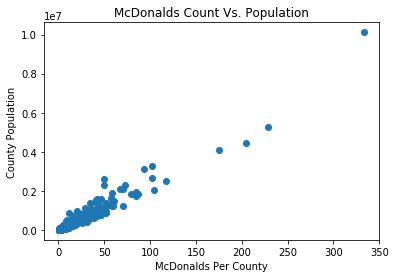

In [38]:
plt.scatter(df_main['McDonalds Count'], df_main['Population'])
plt.title("McDonalds Count Vs. Population")
plt.xlabel("McDonalds Per County")
plt.ylabel("County Population")

In [37]:
linregress(df_main['McDonalds Count'], df_main['Population'])

LinregressResult(slope=25514.178132725545, intercept=-19337.666993152758, rvalue=0.9710176738171435, pvalue=0.0, stderr=150.68374960370525)